In [132]:
import pickle
import shap
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [117]:
model_path = "../outputs/logistic_regression_none_poverty.pkl"
model = joblib.load(model_path)

In [118]:
train_path = "../outputs/train_df.csv"
test_path = "../outputs/test_df.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [119]:
X_train = train_df.drop(columns=["fully_funded", "date_posted"])
y_train = train_df["fully_funded"]

X_test = test_df.drop(columns=["fully_funded", "date_posted"])
y_test = test_df["fully_funded"]

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((415544, 132), (114037, 133), (415544,), (114037,))

In [121]:
set(X_train.columns) - set(X_test.columns)
set(X_test.columns) - set(X_train.columns)
X_test = X_test[X_train.columns]

In [122]:
X_train.shape, X_test.shape

((415544, 132), (114037, 132))

In [124]:
background = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(model.predict_proba, background)
X_test_sample = X_test.sample(n=20, random_state=2024) 
shap_values = explainer.shap_values(X_test_sample)

In [127]:
shap_values[0], shap_values[1]

(array([[ 0.02707481,  0.        ,  0.        , ...,  0.        ,
         -0.0027913 , -0.32261651],
        [ 0.83853023,  0.        ,  0.00383307, ...,  0.        ,
          0.0120943 ,  0.03903931],
        [-0.02616042, -0.00141739,  0.        , ...,  0.        ,
         -0.00164677, -0.40393442],
        ...,
        [-0.12351781,  0.        ,  0.00381294, ...,  0.        ,
          0.        ,  0.00445807],
        [-0.46374646,  0.        , -0.00370302, ...,  0.        ,
         -0.00324085,  0.02445596],
        [-0.05941291,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.45818301]]),
 array([[-0.02707481,  0.        ,  0.        , ...,  0.        ,
          0.0027913 ,  0.32261651],
        [-0.83853023,  0.        , -0.00383307, ...,  0.        ,
         -0.0120943 , -0.03903931],
        [ 0.02616042,  0.00141739,  0.        , ...,  0.        ,
          0.00164677,  0.40393442],
        ...,
        [ 0.12351781,  0.        , -0.00381294, ...,  

In [130]:
model.classes_

array([0., 1.])

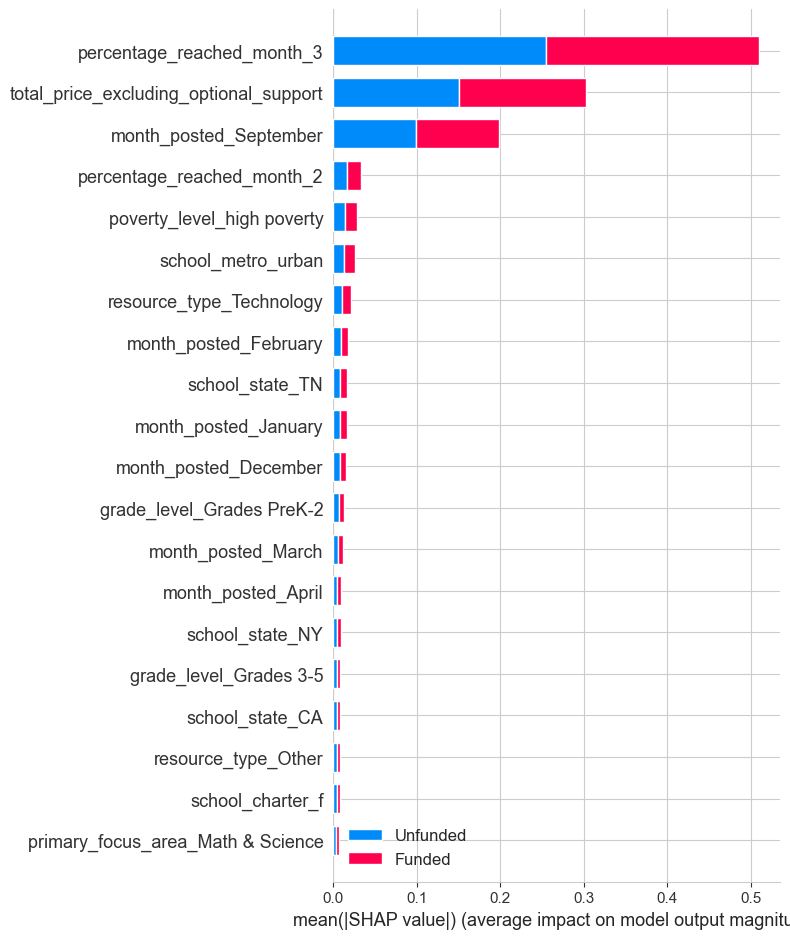

In [133]:
class_names = ["Unfunded", "Funded"]
shap.summary_plot(shap_values, X_test_sample, class_names=class_names)
plt.savefig("../outputs/summary_plot_custom_classes.png", bbox_inches="tight")

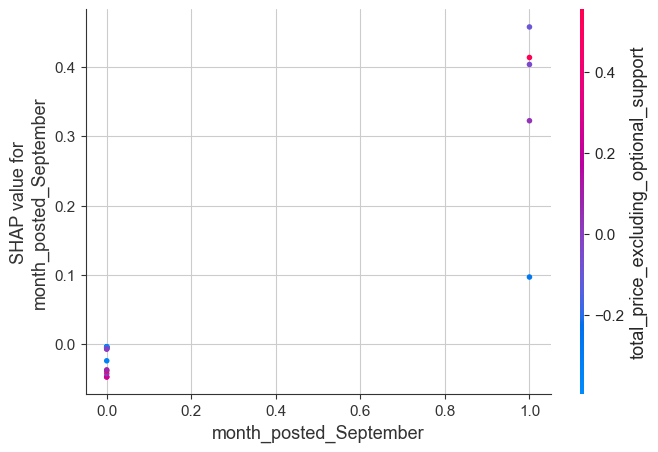

In [135]:
shap.dependence_plot("month_posted_September", shap_values[1], X_test_sample)

In [136]:
shap.force_plot(
    explainer.expected_value[1],  # Base value for Class 1 (Funded)
    shap_values[1][0, :],        # SHAP values for the first instance for Class 1
    X_test_sample.iloc[0, :]     # Feature values for the first instance
)

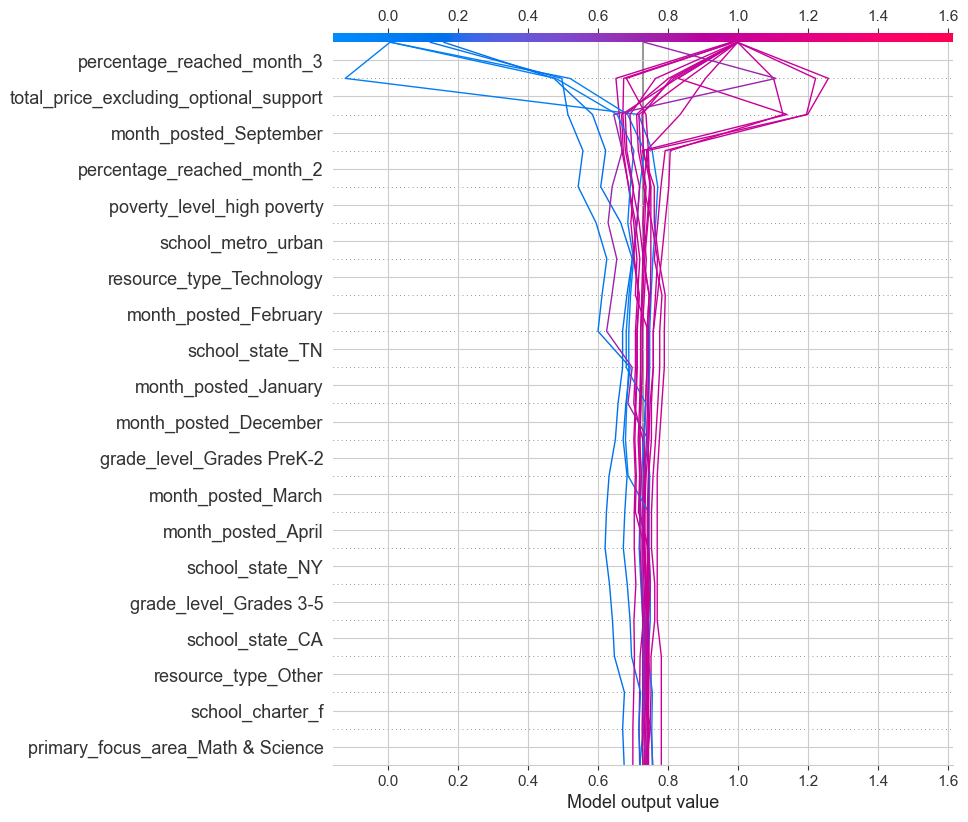

In [137]:
shap.decision_plot(
    explainer.expected_value[1],  # Base value for Class 1
    shap_values[1],               # SHAP values for Class 1
    X_test_sample
)

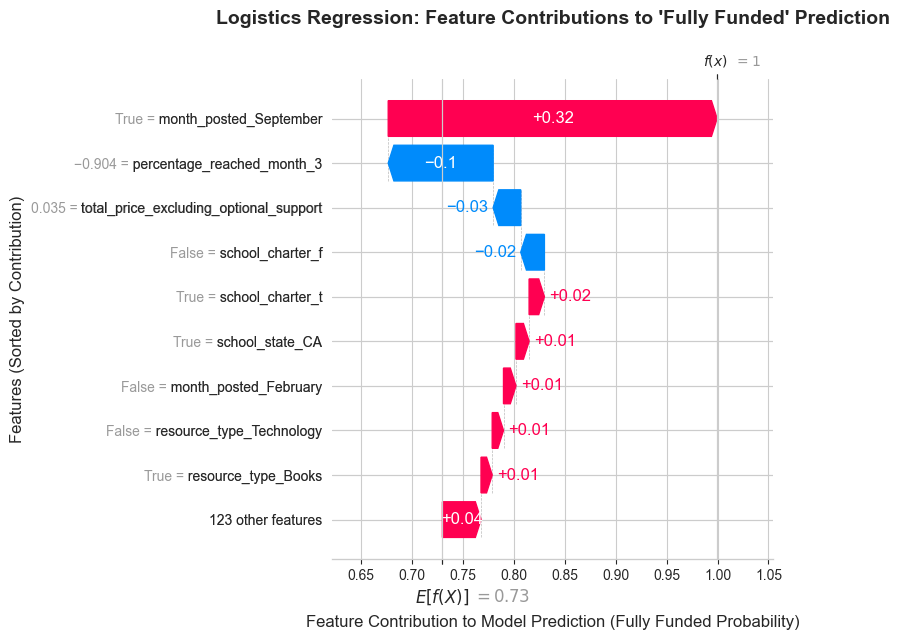

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title(
    "Logistics Regression: Feature Contributions to 'Fully Funded' Prediction\n",
    fontsize=14, fontweight="bold"
)

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[1][0, :], 
        base_values=explainer.expected_value[1],  
        data=X_test_sample.iloc[0, :],
        feature_names=X_test_sample.columns 
    ),
    show=False
)

ax.set_xlabel("Feature Contribution to Model Prediction (Fully Funded Probability)", fontsize=12, labelpad=23)
ax.set_ylabel("Features (Sorted by Contribution)", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.xticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()
